p# Sistemas Lineales<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Ejemplo Sencillo con FFT

Referencias:

* [Real Python (FFT)](https://realpython.com/python-scipy-fft/)

## Generación de una Onda Seno

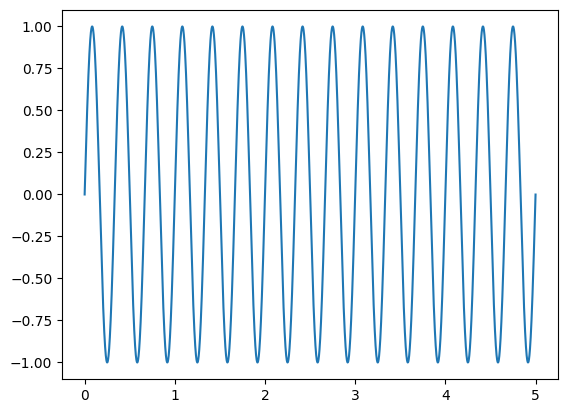

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(3, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

## Audio + Ruido

In [ ]:
_, nice_tone   = generate_sine_wave( 440, SAMPLE_RATE, DURATION)
_, noise_tone1 = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
_, noise_tone2 = generate_sine_wave(5000, SAMPLE_RATE, DURATION)
_, noise_tone3 = generate_sine_wave(6000, SAMPLE_RATE, DURATION)
_, noise_tone4 = generate_sine_wave(7000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone1 * 0.1 + noise_tone2 * 0.2 + noise_tone3 * 0.3 + noise_tone4 * 0.4

mixed_tone = nice_tone + noise_tone

y_original = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(y_original[:1000])
plt.show()

In [ ]:
from scipy.io import wavfile

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
wavfile.write("original.wav", SAMPLE_RATE, y_original)

In [ ]:
import IPython.display as ipd
ipd.Audio('original.wav') # This is required on Google Colab due to compatibility issues


In [ ]:
import librosa
import IPython.display as ipd
sample, sr = librosa.core.load('original.wav')
ipd.Audio(sample, rate=SAMPLE_RATE)

In [ ]:
# How to read a wav file
SAMPLE_RATE, y_original = wavfile.read('original.wav')
plt.plot(y_original[:1000])
plt.show()

## Transformada de Fourier

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in y_original
N = len(y_original) # = SAMPLE_RATE * DURATION

yf = fft(y_original)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(y_original)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

## Filtrando

In [ ]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 2000)

yf_abs = np.abs(yf)

plt.plot(xf,yf_abs)

hf = np.ones((len(xf),))
hf[target_idx:] = 0
plt.plot(xf, hf*np.max(yf_abs)/2)
plt.legend(['signal','filter'])
plt.show()


In [ ]:
# Filtering
yff = np.multiply(yf,hf)
plt.plot(xf, np.abs(yff))
plt.show()

In [ ]:
from scipy.fft import irfft

y_filtered_real = irfft(yff).real
y_filtered      = y_filtered_real.astype(np.int16)

plt.plot(y_original[:1000])
plt.plot(y_filtered[:1000])
plt.show()

In [ ]:
# Remember SAMPLE_RATE = 44100 Hz is our playback rate
wavfile.write("filtered.wav", SAMPLE_RATE, y_filtered)

In [ ]:
import IPython.display
IPython.display.Audio('filtered.wav') # This is required on Google Colab due to compatibility issues


In [ ]:
IPython.display.Audio('original.wav') # This is required on Google Colab due to compatibility issues


# Ejemplos avanzados

* From [Audio Processing (colab)](https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb#scrollTo=zWgVpXThNqVD)


## Ejemplo 1: onda seno

In [ ]:
clone = "git clone https://github.com/AllenDowney/ThinkDSP.git"
os.system(clone)

In [ ]:
# This file shows how to generate a sine wave using the ThinkDSP library.
import sys
sys.path.insert(0, 'ThinkDSP/code/')
from scipy.integrate import cumulative_trapezoid
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython.display

# Generate wave
sin = thinkdsp.SinSignal(freq=400, amp=0.5) # Where freq is the frequency and amp is the amplitude of the sine wave
wave = sin.make_wave(duration=2, start=0, framerate=44100) # Turn the sin wave into an audio wave

# Plot wave
period = sin.period
segment = wave.segment(start=0, duration=period*3)
segment.plot()
pyplot.show()

# Play wave
wave.play()
IPython.display.Audio('sound.wav') # This is required on Google Colab due to compatibility issues


In [ ]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Generate wave
sin1 = thinkdsp.SinSignal(freq=400, amp=0.5)
sin2 = thinkdsp.SinSignal(freq=800, amp=0.3)
mix = sin1 + sin2 # Notice here how 2 waves can be added together
wave = mix.make_wave(duration=2, start=0, framerate=44100)

# Plot wave
period = mix.period
segment = wave.segment(start=0, duration=period*3)
segment.plot()
pyplot.show()

# Play wave
wave.play()
IPython.display.Audio('sound.wav')

In [ ]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Generate wave
sin1 = thinkdsp.SinSignal(freq=400, amp=0.5)
sin2 = thinkdsp.SinSignal(freq=800, amp=0.3)
mix = sin1 + sin2 # Notice here how 2 waves can be added together
wave = mix.make_wave(duration=2, start=0, framerate=44100)

# Plot spectrum of wave
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play wave
wave.play()
IPython.display.Audio('sound.wav')

## Ejemplo 2: archivo de audio

In [ ]:
clone_1 = "git clone https://github.com/Tyler-Hilbert/AudioProcessingInPythonWorkshop.git"
os.system(clone_1)

In [ ]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Read in audio file
# FIXME - will this work for non wav files
wave = thinkdsp.read_wave('AudioProcessingInPythonWorkshop/test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

In [ ]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Read in audio file
wave = thinkdsp.read_wave('AudioProcessingInPythonWorkshop/test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]


# Filter
spectrum = wave.make_spectrum()
spectrum.low_pass(cutoff = 500, factor = .1)
#spectrum.high_pass(cutoff = 1500, factor = .1) # FIXME - Change back to low pass filter
filteredWave = spectrum.make_wave()

# Plot spectrum of audio file
spectrum = filteredWave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play filtered audio file
filteredWave.play()
IPython.display.Audio('sound.wav')

In [ ]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Read in audio file
wave = thinkdsp.read_wave('AudioProcessingInPythonWorkshop/test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]


# Filter
spectrum = wave.make_spectrum()
spectrum.high_pass(cutoff = 1500, factor = .1) # FIXME - Change back to low pass filter
filteredWave = spectrum.make_wave()

# Add filtered wave to original wave
filteredWave.ys *= 10 # Increase the filtered wave's power so the treble effect is more noticable
combinedWave = filteredWave + wave

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play filtered audio file
combinedWave.play()
IPython.display.Audio('sound.wav')

## Ejemplo 3: archivo mp3

In [ ]:
import ffmpeg
print("FFmpeg instalado correctamente.")

In [ ]:
wave = thinkdsp.read_wave('AudioProcessingInPythonWorkshop/rock.wav') # Paste this into the previous examples

In [ ]:
IPython.display.Audio('AudioProcessingInPythonWorkshop/rock.wav')

*Use el código del ejemplo 2 para filtrar esta señal de audio*

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).